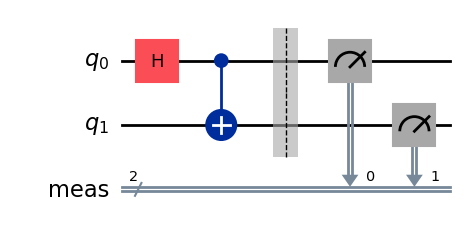

In [1]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)

 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Add a measurement to both qubits
qc.measure_all()
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

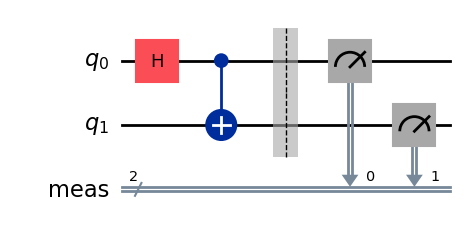

In [2]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import Aer

# Generate a preset pass manager for the Aer simulator
pm = generate_preset_pass_manager(optimization_level=0, backend=Aer.get_backend('aer_simulator'), target=Aer.get_backend('aer_simulator').target)

# Transpile the circuit using the preset pass manager
transpiled_circuit = pm.run(qc)

# Print the transpiled circuit
transpiled_circuit.draw("mpl", idle_wires=False, style="iqp")

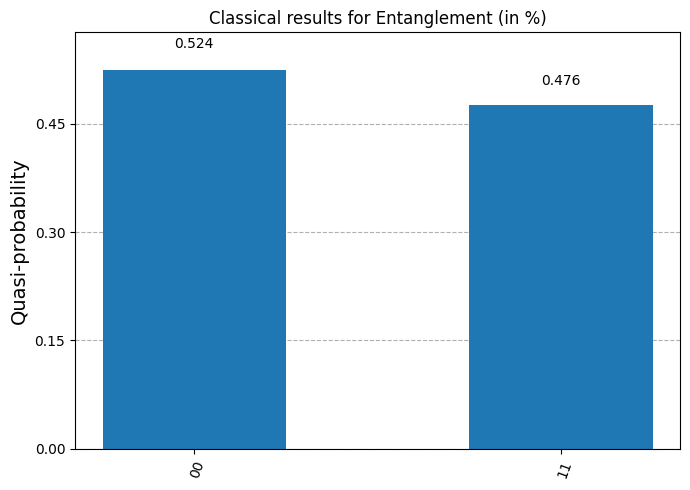

In [3]:
from qiskit_ibm_runtime import SamplerV2, Sampler
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution

# Construct an ideal simulator with SamplerV2
backend = Aer.get_backend("aer_simulator")
sampler = Sampler(mode=backend)

job = sampler.run([transpiled_circuit], shots=500)

# Perform an ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()
plot_distribution(counts_ideal, title="Classical results for Entanglement (in %)")

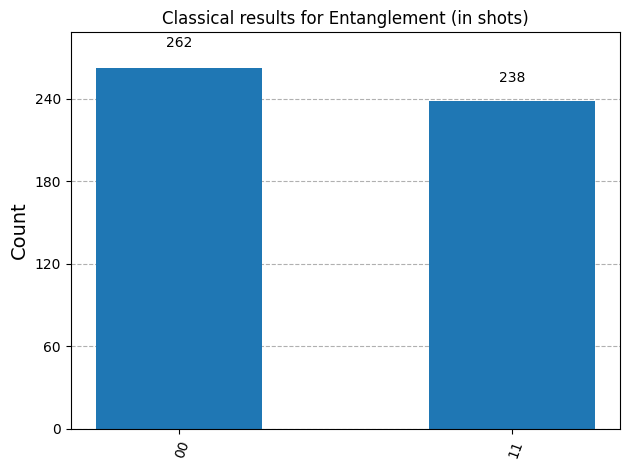

In [4]:
plot_histogram(counts_ideal, title="Classical results for Entanglement (in shots)")